In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Data Preprocessing

According to the Kaggle project information, this dataset has already been cleaned, however we can still do some check to make sure it is actually clean.

In [2]:
file_path = "../data/diabetes_012_health_indicators_BRFSS2015.csv"
df = pd.read_csv(file_path)

In [3]:
print(df.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [4]:
print(df.describe())

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

In [5]:
# Check missing values
print(df.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


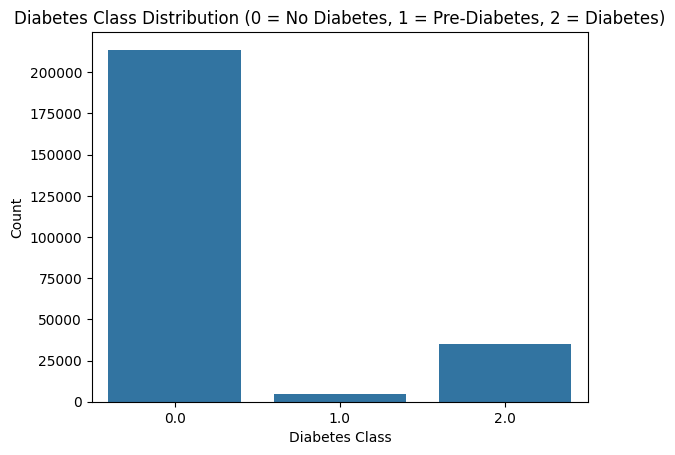

In [6]:
sns.countplot(data=df, x="Diabetes_012")
plt.title("Diabetes Class Distribution (0 = No Diabetes, 1 = Pre-Diabetes, 2 = Diabetes)")
plt.xlabel("Diabetes Class")
plt.ylabel("Count")
plt.show()

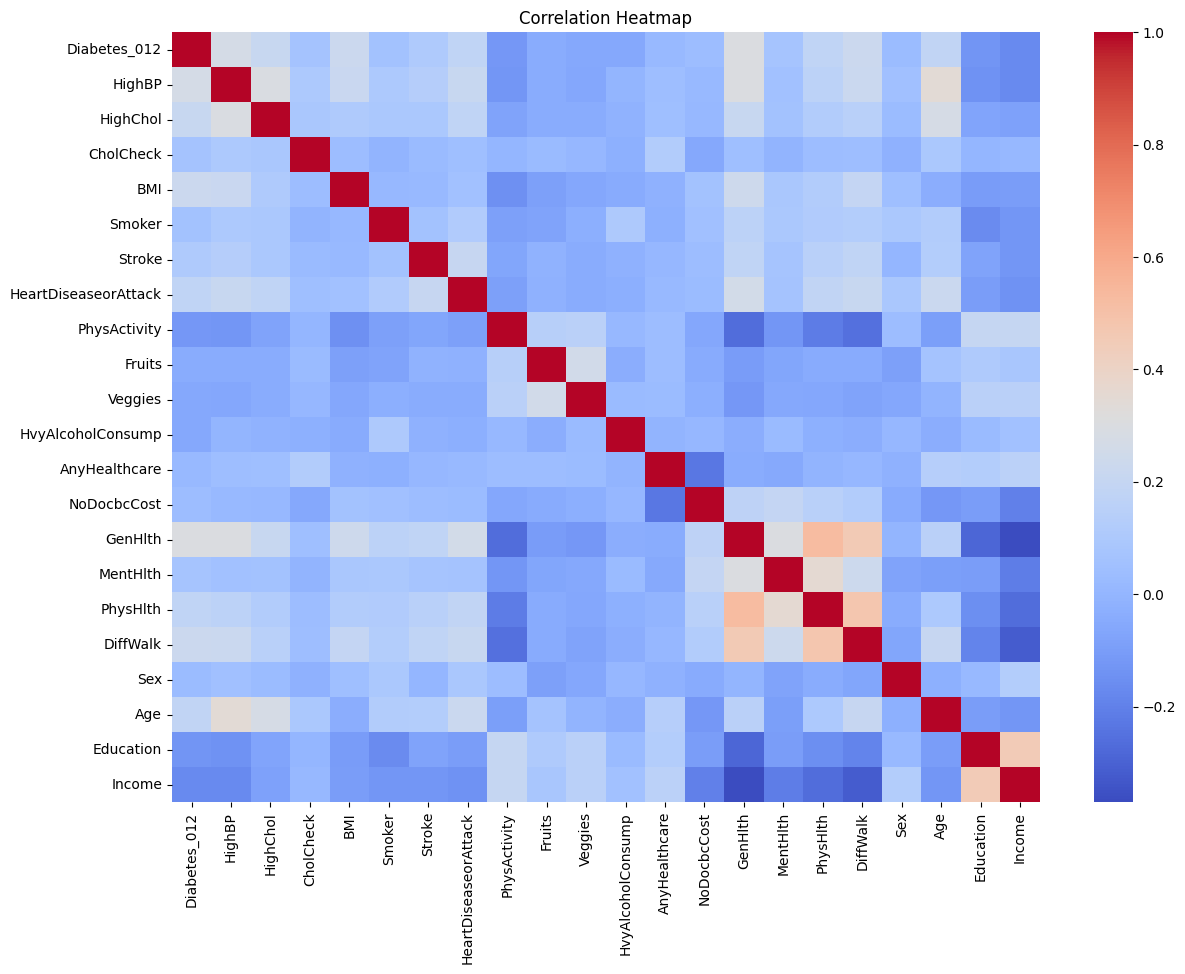

In [7]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# The correlation heatmap shows some strong correlation between PhysHlth and Genhlth, we may want to combine these predictors
# There is also a correlation between education and income, we may want to remove one of those predictors
# DiffWalk and PhysHlth could be combined
# DiffWalk and GenHlth could be combined

In [8]:
# Drop duplicate rows
before_row_number = df.shape[0]
df.drop_duplicates(inplace=True)
aftern_row_number = df.shape[0]
print(f"Dropped {before_row_number - aftern_row_number} duplicate rows.")

Dropped 23899 duplicate rows.


In [9]:
df = df.dropna()

In [10]:
# Saved cleaned dataset as another csv for the model step to use
cleaned_file_path = "../data/cleaned_diabetes_health_indicators_dataset.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to: {cleaned_file_path}")

Cleaned data saved to: ../data/cleaned_diabetes_health_indicators_dataset.csv


# Preprocessing
This section is where the data is prepared for the various models in the ensamble. Numerical predictors are standardized, categorical predictors are converted into dummy variables, and the training and testing datasets are split. Undersampling is applied to reduce training time of complex models.

In [11]:
# Load cleaned data from eda step
file_path = "../data/cleaned_diabetes_health_indicators_dataset.csv"
df = pd.read_csv(file_path)

# Numerical Predictors
    # BMI
    # MentHlth
    # PhysHlth
    # Age
    # Income

# Categorical Predictors
    # HighBP
    # HighChol
    # CholCheck
    # Smoker
    # Stroke
    # HeartDiseaseorAttack
    # PhysActivity
    # Fruits
    # Veggies
    # HvyAlcoholConsump
    # AnyHealthcare
    # NoDocbcCost
    # GenHlth
    # DiffWalk
    # Sex
    # Education

# Target
    # Diabetes_012

# Standardize Data
dependent_column = ["Diabetes_012"]
numerical_predictor_columns = ["BMI", "MentHlth", "PhysHlth", "Age", "Income"]

# Find Z-score of Numerical Predictors
Z_train = preprocessing.scale(df[numerical_predictor_columns])
Z_train = pd.DataFrame(Z_train, columns=numerical_predictor_columns)

# Create dummy vars
dummy_HighBP = pd.get_dummies(df["HighBP"], drop_first=True)
dummy_HighChol = pd.get_dummies(df["HighChol"], drop_first=True)
dummy_CholCheck = pd.get_dummies(df["CholCheck"], drop_first=True)
dummy_Smoker = pd.get_dummies(df["Smoker"] , drop_first=True)
dummy_Stroke = pd.get_dummies(df["Stroke"] , drop_first=True)
dummy_HeartDiseaseorAttack = pd.get_dummies(df["HeartDiseaseorAttack"] , drop_first=True)
dummy_PhysActivity = pd.get_dummies(df["PhysActivity"] , drop_first=True)
dummy_Fruits = pd.get_dummies(df["Fruits"] , drop_first=True)
dummy_Veggies = pd.get_dummies(df["Veggies"] , drop_first=True)
dummy_HvyAlcoholConsump = pd.get_dummies(df["HvyAlcoholConsump"] , drop_first=True)
dummy_AnyHealthcare = pd.get_dummies(df["AnyHealthcare"] , drop_first=True)
dummy_NoDocbcCost = pd.get_dummies(df["NoDocbcCost"] , drop_first=True)
dummy_GenHlth = pd.get_dummies(df["GenHlth"] , drop_first=True)
dummy_DiffWalk = pd.get_dummies(df["DiffWalk"] , drop_first=True)
dummy_Sex = pd.get_dummies(df["Sex"] , drop_first=True)
dummy_Education = pd.get_dummies(df["Education"] , drop_first=True)

# Concatenate the standardized numerical features with the dummy vars
X = pd.concat([Z_train, dummy_HighBP, dummy_HighChol, dummy_CholCheck, dummy_Smoker, dummy_Stroke, dummy_HeartDiseaseorAttack,
                     dummy_PhysActivity, dummy_Fruits, dummy_Veggies, dummy_HvyAlcoholConsump, dummy_AnyHealthcare, dummy_NoDocbcCost,
                    dummy_GenHlth, dummy_DiffWalk, dummy_Sex, dummy_Education], axis=1)
y = df[dependent_column]

# Do this to avoid warnings
y = y.values.ravel()



# Split data into training and test data after standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
y_train = pd.Series(y_train, name='Diabetes_012')
y_test = pd.Series(y_test, name='Diabetes_012')

X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_test.columns)

# Define strategy: target number of samples per class
undersample_strategy = {0.0: 4000, 1.0: 2000, 2.0: 2000}

# Initialize undersampler
rus = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)

# Apply undersampling
X_train, y_train = rus.fit_resample(X_train, y_train)

# Merge Class 1 and 2 into single class
y_train_binary = y_train.copy()
y_train_binary[y_train_binary == 2] = 1

y_test_binary = y_test.copy()
y_test_binary[y_test_binary == 2] = 1

# Check new class distribution
print("New class distribution:", Counter(y_train))
print("New class distribution:", Counter(y_train_binary))

New class distribution: Counter({0.0: 4000, 1.0: 2000, 2.0: 2000})
New class distribution: Counter({0.0: 4000, 1.0: 4000})


# Export
This section is where the prepared data is exported to .csv files for use by the various models in the ensamble

In [12]:
# --------------------------------------------
# Save final predictions
# --------------------------------------------
import os
os.makedirs("data", exist_ok=True)
X_train.to_csv("data/X_train.csv")
y_train.to_csv("data/y_train.csv")
y_train_binary.to_csv("data/y_train_binary.csv")
X_test.to_csv("data/X_test.csv")
y_test.to_csv("data/y_test.csv")
y_test_binary.to_csv("data/y_test_binary.csv")